## Предобработка данных

In [85]:
# Библиотеки

import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

pd.options.mode.chained_assignment = None
from sklearn.preprocessing import StandardScaler 

from sklearn.preprocessing import OrdinalEncoder

from sklearn.metrics import mean_squared_error as MSE

from sklearn.linear_model import LinearRegression
import lightgbm as lgb

from sklearn.model_selection import train_test_split

from sklearn.metrics import make_scorer
from sklearn.model_selection import GridSearchCV

import time
from datetime import datetime
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('/datasets/autos.csv')

In [3]:
df.head()

,DateCrawled,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Kilometer,RegistrationMonth,FuelType,Brand,NotRepaired,DateCreated,NumberOfPictures,PostalCode,LastSeen
0,2016-03-24 11:52:17,480,NaN,1993,manual,0,golf,150000,0,petrol,volkswagen,NaN,2016-03-24 00:00:00,0,70435,2016-04-07 03:16:57
1,2016-03-24 10:58:45,18300,coupe,2011,manual,190,NaN,125000,5,gasoline,audi,yes,2016-03-24 00:00:00,0,66954,2016-04-07 01:46:50
2,2016-03-14 12:52:21,9800,suv,2004,auto,163,grand,125000,8,gasoline,jeep,NaN,2016-03-14 00:00:00,0,90480,2016-04-05 12:47:46
3,2016-03-17 16:54:04,1500,small,2001,manual,75,golf,150000,6,petrol,volkswagen,no,2016-03-17 00:00:00,0,91074,2016-03-17 17:40:17
4,2016-03-31 17:25:20,3600,small,2008,manual,69,fabia,90000,7,gasoline,skoda,no,2016-03-31 00:00:00,0,60437,2016-04-06 10:17:21


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 354369 entries, 0 to 354368
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   DateCrawled        354369 non-null  object
 1   Price              354369 non-null  int64 
 2   VehicleType        316879 non-null  object
 3   RegistrationYear   354369 non-null  int64 
 4   Gearbox            334536 non-null  object
 5   Power              354369 non-null  int64 
 6   Model              334664 non-null  object
 7   Kilometer          354369 non-null  int64 
 8   RegistrationMonth  354369 non-null  int64 
 9   FuelType           321474 non-null  object
 10  Brand              354369 non-null  object
 11  NotRepaired        283215 non-null  object
 12  DateCreated        354369 non-null  object
 13  NumberOfPictures   354369 non-null  int64 
 14  PostalCode         354369 non-null  int64 
 15  LastSeen           354369 non-null  object
dtypes: int64(7), object(

In [5]:
df['NumberOfPictures'].value_counts()

0    354369
Name: NumberOfPictures, dtype: int64

Начнем с оценки данных. Какие колонки здесь лишние.

DateCrawled, LastSeen, PostalCode, DateCreated и NumberOfPictures никак не влияют на стоимость автомобиля, они не как не характеризуют авто. Колонка RegistrationMonth избыточна, года регистрации вполне достаточно. Количество фотографий вообще 0 для всех элементов. От этих колонок можно избавиться, они нам не нужны.

In [6]:
df = df.drop(['DateCrawled', 'LastSeen', 'PostalCode', 'DateCreated', 'NumberOfPictures', 'RegistrationMonth'], axis=1)

In [7]:
display(df.head(5))
df.info()

,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Kilometer,FuelType,Brand,NotRepaired
0,480,NaN,1993,manual,0,golf,150000,petrol,volkswagen,NaN
1,18300,coupe,2011,manual,190,NaN,125000,gasoline,audi,yes
2,9800,suv,2004,auto,163,grand,125000,gasoline,jeep,NaN
3,1500,small,2001,manual,75,golf,150000,petrol,volkswagen,no
4,3600,small,2008,manual,69,fabia,90000,gasoline,skoda,no


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 354369 entries, 0 to 354368
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Price             354369 non-null  int64 
 1   VehicleType       316879 non-null  object
 2   RegistrationYear  354369 non-null  int64 
 3   Gearbox           334536 non-null  object
 4   Power             354369 non-null  int64 
 5   Model             334664 non-null  object
 6   Kilometer         354369 non-null  int64 
 7   FuelType          321474 non-null  object
 8   Brand             354369 non-null  object
 9   NotRepaired       283215 non-null  object
dtypes: int64(4), object(6)
memory usage: 27.0+ MB


Так гораздо удобнее. Теперь посмотрим дубликаты.

In [8]:
df.duplicated().sum()

45040

In [9]:
df = df.drop_duplicates()

In [10]:
display(df.duplicated().sum())
df.info()

0

<class 'pandas.core.frame.DataFrame'>
Int64Index: 309329 entries, 0 to 354368
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Price             309329 non-null  int64 
 1   VehicleType       274770 non-null  object
 2   RegistrationYear  309329 non-null  int64 
 3   Gearbox           292122 non-null  object
 4   Power             309329 non-null  int64 
 5   Model             290968 non-null  object
 6   Kilometer         309329 non-null  int64 
 7   FuelType          278565 non-null  object
 8   Brand             309329 non-null  object
 9   NotRepaired       244771 non-null  object
dtypes: int64(4), object(6)
memory usage: 26.0+ MB


Теперь займемся пропусками. Пойдем по порядку.

In [11]:
display(df[df['VehicleType'].isna()])
df['VehicleType'].isna().sum()

,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Kilometer,FuelType,Brand,NotRepaired
0,480,NaN,1993,manual,0,golf,150000,petrol,volkswagen,NaN
16,300,NaN,2016,NaN,60,polo,150000,petrol,volkswagen,NaN
22,2900,NaN,2018,manual,90,meriva,150000,petrol,opel,no
26,5555,NaN,2017,manual,125,c4,125000,NaN,citroen,no
31,899,NaN,2016,manual,60,clio,150000,petrol,renault,NaN
...,...,...,...,...,...,...,...,...,...,...
354346,2600,NaN,2005,auto,0,c_klasse,150000,NaN,mercedes_benz,NaN
354351,1900,NaN,2000,manual,110,NaN,150000,NaN,volkswagen,no
354361,5250,NaN,2016,auto,150,159,150000,NaN,alfa_romeo,no
354364,0,NaN,2005,manual,0,colt,150000,petrol,mitsubishi,yes


34559

Можно попробовать заменить, взяв эти значения из колонок, где есть такие же машины. Тот же бренд и модель.

In [12]:
# Посмотрим на некоторые модели машин
df.query("Brand == 'volkswagen' and Model == 'polo'")['VehicleType'].unique()

array([nan, 'small', 'sedan', 'wagon', 'coupe', 'convertible', 'bus',
       'other', 'suv'], dtype=object)

Ээээ... Я посмотрела весь Топ Гир дважды. Не может быть Поло автобусом. Что-то тут не клеится. Посмотрим другую машину.

In [13]:
df.query("Brand == 'skoda' and Model == 'fabia'")['VehicleType'].unique()

array(['small', 'wagon', nan, 'sedan', 'other', 'bus', 'convertible',
       'suv'], dtype=object)

В связи с аномалиями в данных, сложно подобрать один вариант для пропуска вряд ли получится. Заполним как unknown.

In [14]:
df['VehicleType'] = df['VehicleType'].fillna('unknown')

Перейдем к столбцу Gearbox. 

In [15]:
df['Gearbox'].unique()

array(['manual', 'auto', nan], dtype=object)

Так как некоторые модели автомобилей производят и с автоматической, и с ручной коробкой передач, то угадать значение пропусков очень сложно. Поэтому заполним пропуски значением unknown.

In [16]:
df['Gearbox'] = df['Gearbox'].fillna('unknown')

Теперь посмотрим на Power. Пропуском в колонке нет, но есть нулевые значения, которые будут мешать работе модели.

In [17]:
sum(df['Power'] == 0)

35978

Посмотрим, сколько есть машин с указанием мощности меньше 60 лс, то есть меньше мощности жигулей.

In [18]:
sum(df['Power'] < 60)

55595

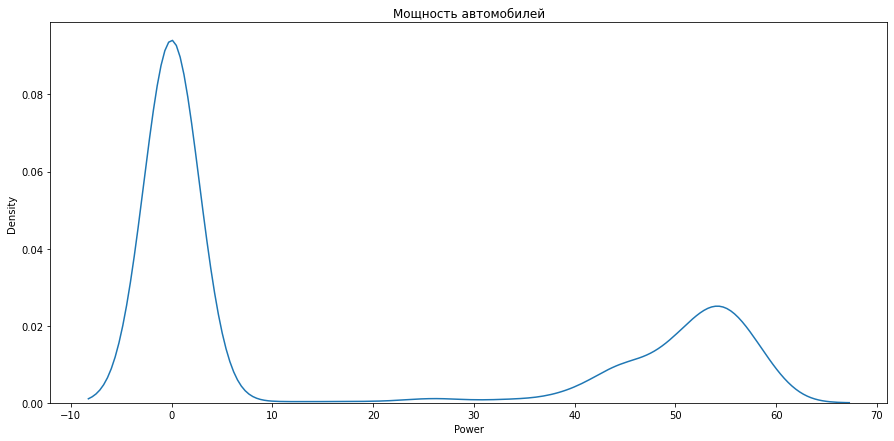

In [19]:
plt.figure(figsize=(15,7))
sns.kdeplot(df["Power"][df['Power'] < 60])

plt.title('Мощность автомобилей')
plt.show()

Что же это за автомобили такие? Пожалуй, уберем их вместе с нулями. Заполним с помощью группировки по модели, бренду и году регистрации.

In [20]:
df.loc[(df['Power'] == 0), 'Power'] = round(df.groupby(['Model', 'Brand', 'RegistrationYear'])['Power'].transform('median'))

In [21]:
sum(df['Power'] < 60)

25965

Оставшиеся строки можно удалить.

In [22]:
df = df.loc[df['Power'] > 60]

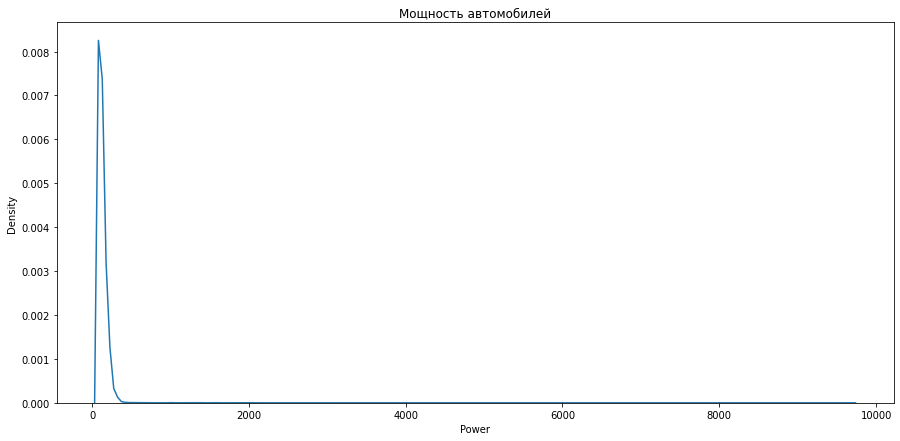

In [23]:
# Посмотрим на график ещё раз

plt.figure(figsize=(15,7))
sns.kdeplot(df["Power"][df['Power'] < 10000])

plt.title('Мощность автомобилей')
plt.show()

Теперь левая часть графика выглядит нормально. Мощность Соляриса - 100-123 лс. Это пример одной из самых популярнымх моделей легкового автомобиля. Посмотримм теперь на выбросы справа.

In [67]:
df.sort_values(by=['Power']).tail(10)

,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Kilometer,FuelType,Brand,NotRepaired
195787,7000,small,2009,manual,776.0,punto,60000,electric,fiat,no
304525,2500,unknown,2017,manual,800.0,sandero,125000,lpg,dacia,no
267787,400,small,1994,manual,890.0,twingo,150000,petrol,renault,no
301843,230,small,1993,manual,998.0,micra,150000,petrol,nissan,no
240661,700,small,1996,manual,1275.0,micra,80000,petrol,nissan,no
211816,3950,small,1972,manual,1300.0,kaefer,150000,petrol,volkswagen,unknown
261022,900,wagon,1992,auto,1992.0,touareg,150000,unknown,volkswagen,unknown
53158,1200,small,2001,manual,2742.0,seicento,150000,unknown,fiat,no
143053,120,small,1996,manual,2938.0,twingo,150000,petrol,renault,yes
143118,6500,small,1987,manual,6018.0,cooper,60000,petrol,mini,unknown


Все ясно. Кажется, кто то помножит мощность своего авто на 100, потому что у ауди а4 примерная мощность как раз 163 лс.
Применим тот же метод, только уже для машин, мощность которых больше 800. Вряд ли кто-то продает ламборджини.

In [25]:
df.loc[(df['Power'] > 800), 'Power'] = round(df.groupby(['Model', 'Brand', 'RegistrationYear'])['Power'].transform('median'))

Посмотрим сколько образовалось пропусков.

In [26]:
sum(df['Power'].isna())

40

In [27]:
df.dropna(subset=['Power'], inplace=True)

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 262529 entries, 0 to 354368
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Price             262529 non-null  int64  
 1   VehicleType       262529 non-null  object 
 2   RegistrationYear  262529 non-null  int64  
 3   Gearbox           262529 non-null  object 
 4   Power             262529 non-null  float64
 5   Model             251917 non-null  object 
 6   Kilometer         262529 non-null  int64  
 7   FuelType          241009 non-null  object 
 8   Brand             262529 non-null  object 
 9   NotRepaired       214223 non-null  object 
dtypes: float64(1), int64(3), object(6)
memory usage: 22.0+ MB


Пропуски в моделях машин так же восстановить нереально. Их совсем немного, можно удалить.

In [29]:
df.dropna(subset=['Model'], inplace=True)

Теперь посмотрим колонку Kilometer. Удобнее это будет сделать на графике.

<AxesSubplot:xlabel='Kilometer', ylabel='Density'>

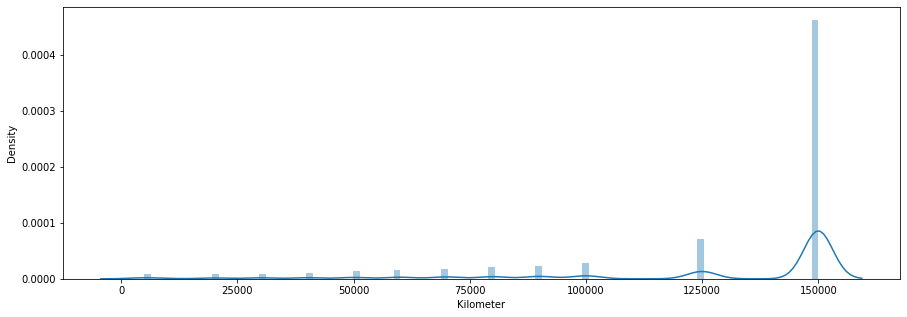

In [30]:
plt.figure(figsize = (15,5))
sns.distplot(df['Kilometer'], bins=100)

Все выглядит вполне логично. Данные округляют до 10000. Возможно пользователь не сам вписывает пробег, а выбирает из вариантов. А 150000 это вариант максимального пробега. 

Теперь посмотрим на тип топлива. Тут уже много пропусков.

In [31]:
display(df['FuelType'].value_counts())
sum(df['FuelType'].isnull())

petrol      148024
gasoline     80186
lpg           4399
cng            459
hybrid         191
other           69
electric        32
Name: FuelType, dtype: int64

18557

Заполним пропуски с помощью unknown.

In [32]:
df['FuelType'].fillna('unknown', inplace=True)

Посмотрим бренды, нет ли ошибок и неявных дубликатов.

In [33]:
df['Brand'].value_counts()

volkswagen       50203
bmw              29761
mercedes_benz    27314
opel             25644
audi             24191
ford             17152
renault          10611
peugeot           7548
fiat              4905
mazda             4701
seat              4429
skoda             4346
toyota            4026
citroen           3881
nissan            3345
hyundai           2867
volvo             2773
mini              2760
mitsubishi        2618
smart             2549
honda             2473
kia               2093
alfa_romeo        1978
suzuki            1724
chevrolet         1359
chrysler          1250
dacia              804
subaru             650
porsche            625
jeep               595
land_rover         467
saab               465
jaguar             452
rover              363
daewoo             332
daihatsu           264
lancia             252
lada               146
trabant              1
Name: Brand, dtype: int64

Тут все в порядке. Похоже, марка автомобилей - это тоже категориальный признак, который выбирает пользователь.

У нас осталась последняя колонка.

In [34]:
sum(df['NotRepaired'].isnull())

44569

Такие данные восстановить тоже нереально. Применим уже любимый unknown

In [35]:
df['NotRepaired'].fillna('unknown', inplace=True)

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 251917 entries, 0 to 354368
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Price             251917 non-null  int64  
 1   VehicleType       251917 non-null  object 
 2   RegistrationYear  251917 non-null  int64  
 3   Gearbox           251917 non-null  object 
 4   Power             251917 non-null  float64
 5   Model             251917 non-null  object 
 6   Kilometer         251917 non-null  int64  
 7   FuelType          251917 non-null  object 
 8   Brand             251917 non-null  object 
 9   NotRepaired       251917 non-null  object 
dtypes: float64(1), int64(3), object(6)
memory usage: 21.1+ MB


Данные почищены. Теперь можно начать подготовку данных к работе с моделями.

### Выбросы

In [38]:
df.describe()

,Price,RegistrationYear,Power,Kilometer
count,251917.000000,251917.000000,251917.000000,251917.000000
mean,5057.073485,2003.881378,128.576932,128149.013366
std,4686.292711,29.244522,54.362694,37533.453599
min,0.000000,1000.000000,61.000000,5000.000000
25%,1499.000000,1999.000000,90.000000,125000.000000
50%,3499.000000,2004.000000,116.000000,150000.000000
75%,7350.000000,2008.000000,150.000000,150000.000000
max,20000.000000,9000.000000,6018.000000,150000.000000


<AxesSubplot:xlabel='Price', ylabel='Density'>

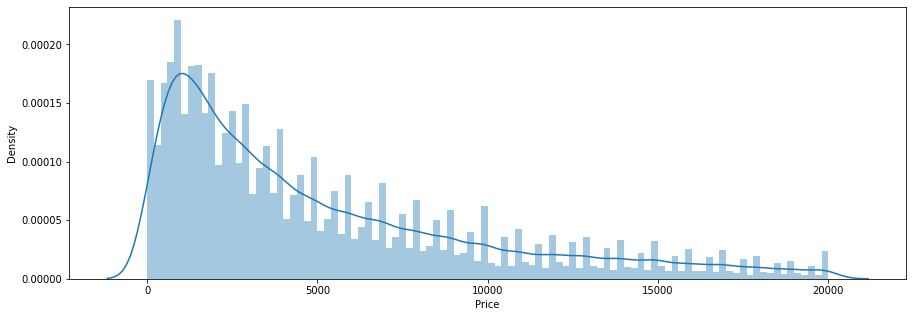

In [39]:
# Начнем с цены
plt.figure(figsize = (15,5))
sns.distplot(df['Price'], bins=100)

Какие любопытные ступеньки. Присмотримся к нулю.

<AxesSubplot:xlabel='Price', ylabel='Density'>

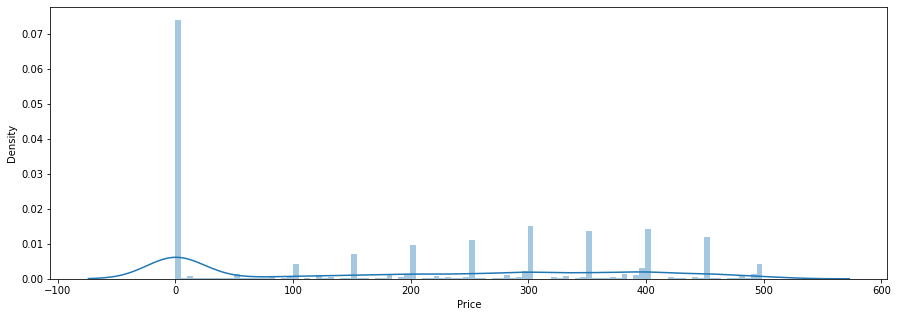

In [40]:
plt.figure(figsize = (15,5))
sns.distplot(df["Price"][df['Price'] < 500], bins=100)

Удалим нули, но нижние выбросы удалять не стоит, так как некоторые машины могут продаваться битые, старые, без половины комплектующих и тогда даже 100 сойдет, лишь бы этот хлам кто-то забрал :)

In [41]:
df = df.loc[df['Price'] > 100]

Далее год регистрации.

In [42]:
df['RegistrationYear'].unique()

array([1993, 2004, 2001, 2008, 1995, 2014, 1998, 2005, 2011, 2007, 2009,
       2002, 2018, 1990, 2017, 1994, 2016, 1991, 1984, 2006, 1999, 2012,
       2000, 1992, 1997, 2013, 2003, 1996, 2010, 1985, 1989, 2015, 1983,
       1981, 1969, 1971, 1987, 1982, 1988, 1980, 1986, 1965, 1974, 1978,
       1976, 1979, 1972, 1968, 1977, 1970, 1966, 1961, 1975, 1500, 1973,
       1910, 1967, 1949, 1963, 1953, 2019, 1958, 1962, 2900, 1964, 1945,
       5911, 1400, 1950, 4000, 1000, 1960, 5000, 1942, 1951, 1956, 1957,
       1955, 1959, 1800, 1954, 8200, 1947, 1937, 1600])

In [43]:
# Избавимся от аномальных данных

df = df.loc[df['RegistrationYear'] > 1970]
df = df.loc[df['RegistrationYear'] < 2018]

## Подготовка данных

### Прямое кодирование

Закодируем все категориальные признаки.

In [44]:
df_ohe = pd.get_dummies(df, columns = ['Gearbox', 'FuelType', 'NotRepaired', 'Model', 'Brand', 'VehicleType'] , drop_first=True)
df_ohe.head(5)

,Price,RegistrationYear,Power,Kilometer,Gearbox_manual,Gearbox_unknown,FuelType_electric,FuelType_gasoline,FuelType_hybrid,FuelType_lpg,...,Brand_volkswagen,Brand_volvo,VehicleType_convertible,VehicleType_coupe,VehicleType_other,VehicleType_sedan,VehicleType_small,VehicleType_suv,VehicleType_unknown,VehicleType_wagon
0,480,1993,75.0,150000,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
2,9800,2004,163.0,125000,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
3,1500,2001,75.0,150000,1,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
4,3600,2008,69.0,90000,1,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
5,650,1995,102.0,150000,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [45]:
df_ohe.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 241866 entries, 0 to 354368
Columns: 307 entries, Price to VehicleType_wagon
dtypes: float64(1), int64(3), uint8(303)
memory usage: 79.1 MB


### Разделение на выборки

In [46]:
features = df_ohe.drop('Price', axis=1)
target = df_ohe['Price']

In [47]:
features_train, features_test, target_train, target_test = train_test_split(features, target, test_size = 0.2, 
                                                                            random_state=12345)

In [48]:
print(features_train.shape)
features_test.shape

(193492, 306)


(48374, 306)

In [49]:
print(target_train.shape)
target_test.shape

(193492,)


(48374,)

## Обучение моделей

Возьмем линейную регрессию и модель градиентного бустинга. 

Метрикой качества будет RMSE.

In [63]:
# Функцию RMSE

def rmse(predictions, target):
    return MSE(predictions, target)**0.5

### Медианная модель

Так как RMSE показательна только в сравнении, создадим предсказания, состоящие из медианных значений таргета. Результаты наших моделей будем сравнивать с показателем эффективности медианы. Если значение RMSE модели будет больше, тогда будет понятно ,что модель работает плохо.

In [64]:
median = target_train.median()
predictions_median = pd.Series(median, index=np.arange(len(target_test)))
rmse_median = rmse(target_test, predictions_median)
rmse_median

4992.304238444497

### Линейная регрессия

In [51]:
model_reg = LinearRegression()

In [86]:
%%time
start = datetime.now()
model_reg.fit(features_train, target_train)
stop = datetime.now()
lr_fit_time = (stop - start).total_seconds()

CPU times: user 13.3 s, sys: 3.99 s, total: 17.3 s
Wall time: 17.3 s


In [87]:
%%time
start = start = datetime.now()
predictions_reg = model_reg.predict(features_test)
stop = datetime.now()
lr_pred_time = (stop - start).total_seconds()

CPU times: user 58.9 ms, sys: 39.7 ms, total: 98.7 ms
Wall time: 66.1 ms


In [54]:
rmse_reg = rmse(target_test, predictions_reg)
rmse_reg

2632.566969650488

Показатель ошибки линейной регрессии вдвое меньше, чем у медианы! Это уже успех. Посмотрим, справится ли лучшее градиентный бустинг.

### Градиентный бустинг

Посмотрим как работает модель по умолчанию.

In [55]:
model_lgb = lgb.LGBMRegressor()

In [88]:
%%time
start = start = datetime.now()

model_lgb.fit(features_train,target_train)

stop = datetime.now()
lgb1_fit_time = (stop - start).total_seconds()

CPU times: user 7.29 s, sys: 265 ms, total: 7.55 s
Wall time: 7.5 s


In [89]:
%%time
start = start = datetime.now()

predictions_lgb1 = model_lgb.predict(features_test)

stop = datetime.now()
lgb1_pred_time = (stop - start).total_seconds()

CPU times: user 403 ms, sys: 65.3 ms, total: 468 ms
Wall time: 417 ms


In [58]:
rmse_lgb1 = rmse(target_test, predictions_lgb1)
rmse_lgb1

1775.6505476357454

Отличные показатели! Может ничего и не менять? Но нет, меня гложет любопытство, что можно выжать из этой малышки :)

Чтобы ускорить подбор гиперпараметров предлагаю написать функцию, которая сразу выведет значение MSE.

In [61]:
def booster(trees):
    train_df = lgb.Dataset(features_train, target_train, feature_name=features.columns.tolist())
    test_df = lgb.Dataset(features_test, target_test, feature_name=features.columns.tolist())

    booster = lgb.train({"objective": "regression"},
                    train_set=train_df, valid_sets=(test_df,),
                    num_boost_round=trees)
    predictions = booster.predict(features_test)
    rmse = rmse(target_test, predictions)
    return rmse

In [62]:
%%time
booster(110)

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006186 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 866
[LightGBM] [Info] Number of data points in the train set: 193492, number of used features: 283
[LightGBM] [Info] Start training from score 5200.381587
[1]	valid_0's l2: 1.91876e+07
[2]	valid_0's l2: 1.67543e+07
[3]	valid_0's l2: 1.476e+07
[4]	valid_0's l2: 1.31188e+07
[5]	valid_0's l2: 1.17513e+07
[6]	valid_0's l2: 1.05898e+07
[7]	valid_0's l2: 9.61352e+06
[8]	valid_0's l2: 8.81645e+06
[9]	valid_0's l2: 8.14176e+06
[10]	valid_0's l2: 7.56497e+06
[11]	valid_0's l2: 7.09039e+06
[12]	valid_0's l2: 6.685e+06
[13]	valid_0's l2: 6.33473e+06
[14]	valid_0's l2: 6.02841e+06
[15]	valid_0's l2: 5.76565e+06
[16]	valid_0's l2: 5.52915e+06
[17]	valid_0's l2: 5.31772e+06
[18]	valid_0's l2: 5.11903e+06
[19]	valid_0's l2: 4.96342e+06
[20]	valid_

1768.986982611119

Как много текста получилось. Но функция работает. Но так перебирать самостоятельно можно очень долго. Попробуем ускорить процесс с помощью GridSearchCV.

In [70]:
params = {'n_estimators': range(63, 66), 'max_depth': range(11,13), 'num_leaves': [145, 160, 5]}
#, 'num_leaves': range(5)

In [71]:
grid = GridSearchCV(estimator=model_lgb, param_grid=params, scoring=rmse)

In [72]:
%%time
grid.fit(features_train, target_train)

CPU times: user 9min 55s, sys: 22.8 s, total: 10min 18s
Wall time: 10min 21s


GridSearchCV(estimator=LGBMRegressor(),
             param_grid={'max_depth': range(11, 13),
                         'n_estimators': range(63, 66),
                         'num_leaves': [145, 160, 5]},
             scoring=<function rmse at 0x7f2bdfdac550>)

In [73]:
grid.best_params_

{'max_depth': 11, 'n_estimators': 63, 'num_leaves': 145}

Теперь посмотрим RMSE для нашей модели.

In [90]:
%%time
start = start = datetime.now()

model_lgb = lgb.LGBMRegressor(n_estimators = 63, max_depth = 11, num_leaves = 145)
model_lgb.fit(features_train,target_train)

stop = datetime.now()
lgb2_fit_time = (stop - start).total_seconds()

CPU times: user 9.91 s, sys: 300 ms, total: 10.2 s
Wall time: 10.3 s


In [91]:
%%time
start = start = datetime.now()

predictions_lgb2 = model_lgb.predict(features_test)
rmse_lgb2 = rmse(target_test, predictions_lgb2)

stop = datetime.now()
lgb2_pred_time = (stop - start).total_seconds()

rmse_lgb2

CPU times: user 423 ms, sys: 65 ms, total: 488 ms
Wall time: 494 ms


1728.7721177580995

In [79]:
rmse_lgb1 - rmse_lgb2

46.878429877645885

## Анализ моделей

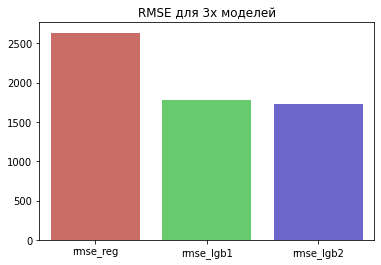

In [97]:
sns.barplot(
    x=['rmse_reg', 'rmse_lgb1', 'rmse_lgb2'], 
    y=[rmse_reg, rmse_lgb1, rmse_lgb2], 
    palette='hls', 
)
plt.title('RMSE для 3х моделей')
plt.show()

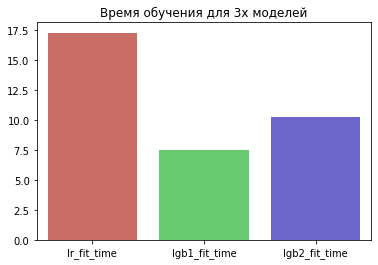

In [96]:
sns.barplot(
    x=['lr_fit_time', 'lgb1_fit_time', 'lgb2_fit_time'], 
    y=[lr_fit_time, lgb1_fit_time, lgb2_fit_time], 
    palette='hls', 
)
plt.title('Время обучения для 3х моделей')
plt.show()

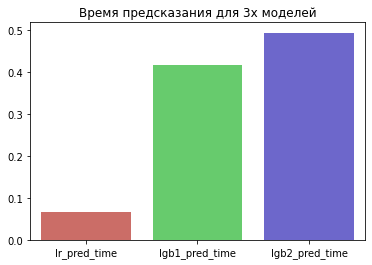

In [99]:
sns.barplot(
    x=['lr_pred_time', 'lgb1_pred_time', 'lgb2_pred_time'], 
    y=[lr_pred_time, lgb1_pred_time, lgb2_pred_time], 
    palette='hls', 
)
plt.title('Время предсказания для 3х моделей')
plt.show()

Медианная модель показала себя хуже всего по качеству, но была самой быстрой, так как ей не нужно обучаться. Разумеется, такие предсказания в реальной жизни не имеют смысла.

Линейная регрессия смогла обучиться быстрее секунды, а предсказания составляла 7,3 секунды. Это приятный результат и с таким временем работать весьма удобно. Однако качество 4992 сомнительное.

Модель градиентного бустинга из библиотеки LightGBM показала лучший результат по качеству. 1775 в 2,5 раза меньше линейной регрессии. Без подбора гиперпараметров модель справилась за 6 секунд. Это определенно победитель в нашем соревновании моделей.

Однако на подбор гиперпараметров уходит кошмарное количество времени. Если искать все три параметра через GridSearch, может уйти полдня. Я по очереди подбирала по одному, прогоняла сначала max_depth, потом следующее и тд. Последний раз это заняло 1 час 38 минут. Конечно, качество модели улучшилось на 46, но стоит ли оно того? Пожалуй, зависит от задачи и сроков её выполнения.